<a href="https://colab.research.google.com/github/GhaniAtmaja/Colab/blob/main/test1_dari_FP_KK_kEL_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Covid Data.csv')
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [ ]:
df.head(3)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2


In [ ]:
df.shape

(1048575, 21)

In [ ]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [ ]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

2    662903
1    385672
Name: USMER, dtype: int64


12    602995
4     314405
6      40584
9      38116
3      19175
8      10399
10      7873
5       7244
11      5577
13       996
7        891
2        169
1        151
Name: MEDICAL_UNIT, dtype: int64


1    525064
2    523511
Name: SEX, dtype: int64


1    848544
2    200031
Name: PATIENT_TYPE, dtype: int64


9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: DATE_DIED, Length: 401, dtype: int64


97    848544
2     159050
1      33656
99      7325
Name: INTUBED, dtype: int64


2     892534
1     140038
99     16003
Name: PNEUMONIA, dtype: int64


30     27010
31     25927
28     25313
29     25134
34     24872
       ...  
114        2
116        2
111        1
121        1
113        1
Name: AGE, Length: 121, dtype: int64


97    523511
2     51317

TRYING TO REMOVE MISSING DATA IN 'OBESITY'

In [ ]:
df1 = df.loc[(df['OBESITY'] == 1) | (df['OBESITY'] == 2)]

In [ ]:
df1['OBESITY'].value_counts()

2    885727
1    159816
Name: OBESITY, dtype: int64

In [ ]:
index_remove_missing = ['USMER', 'SEX', 'PATIENT_TYPE',
       'PNEUMONIA', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO']

In [ ]:
for i in index_remove_missing:
    df = df.loc[(df[i] == 1) | (df[i] == 2)]

In [ ]:
df = df.loc[(df['CLASIFFICATION_FINAL']<4)]

In [ ]:
df['CLASIFFICATION_FINAL'].value_counts()

3    378629
1      8448
2      1801
Name: CLASIFFICATION_FINAL, dtype: int64

In [ ]:
for i in index_remove_missing:
    df[i] = df[i].apply(lambda x: x if x == 1 else 0) 

In [ ]:
df['PREGNANT'] = df['PREGNANT'].apply(lambda x: x if x == 1 else 0)

In [ ]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

0    242944
1    145934
Name: USMER, dtype: int64


12    206249
4     126470
6      17379
9      14195
3       8585
8       4933
11      3732
10      3680
5       2851
7        409
13       343
1         40
2         12
Name: MEDICAL_UNIT, dtype: int64


0    207594
1    181284
Name: SEX, dtype: int64


1    279109
0    109769
Name: PATIENT_TYPE, dtype: int64


9999-99-99    335518
13/07/2020       771
06/07/2020       768
07/07/2020       748
16/07/2020       745
               ...  
20/02/2021         1
18/02/2021         1
11/02/2021         1
10/02/2021         1
17/04/2021         1
Name: DATE_DIED, Length: 288, dtype: int64


97    279109
2      84968
1      23313
99      1488
Name: INTUBED, dtype: int64


0    304091
1     84787
Name: PNEUMONIA, dtype: int64


37     8973
30     8859
40     8853
45     8845
46     8830
       ... 
116       1
105       1
104       1
120       1
106       1
Name: AGE, Length: 109, dtype: int64


0    386134
1      2744
Name: PREGNANT, dtype: int

In [ ]:
df['DATE_DIED'] =  df['DATE_DIED'].apply(lambda x: 0 if x=='9999-99-99' else 1)
df['INTUBED'] = df['INTUBED'].apply(lambda x: x if x==1 else 0)
df['ICU'] = df['ICU'].apply(lambda x: x if x==1 else 0)

In [ ]:
df['DATE_DIED'].value_counts()

0    335518
1     53360
Name: DATE_DIED, dtype: int64

In [ ]:
df['AT_RISK'] = df['DATE_DIED'] + df['INTUBED'] + df['ICU']
df['AT_RISK'] =  df['AT_RISK'].apply(lambda x: 0  if x<1 else 1)

In [ ]:
df['AT_RISK'].value_counts()

0    328899
1     59979
Name: AT_RISK, dtype: int64

In [ ]:
df = df.drop(['DATE_DIED', 'INTUBED', 'ICU'],axis=1)

In [ ]:
df.head(3)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,AT_RISK
0,0,1,1,1,1,65,0,0,0,0,0,1,0,0,0,0,0,3,1
2,0,1,0,0,0,55,0,1,0,0,0,0,0,0,0,0,0,3,1
4,0,1,0,1,0,68,0,1,0,0,0,1,0,0,0,0,0,3,1


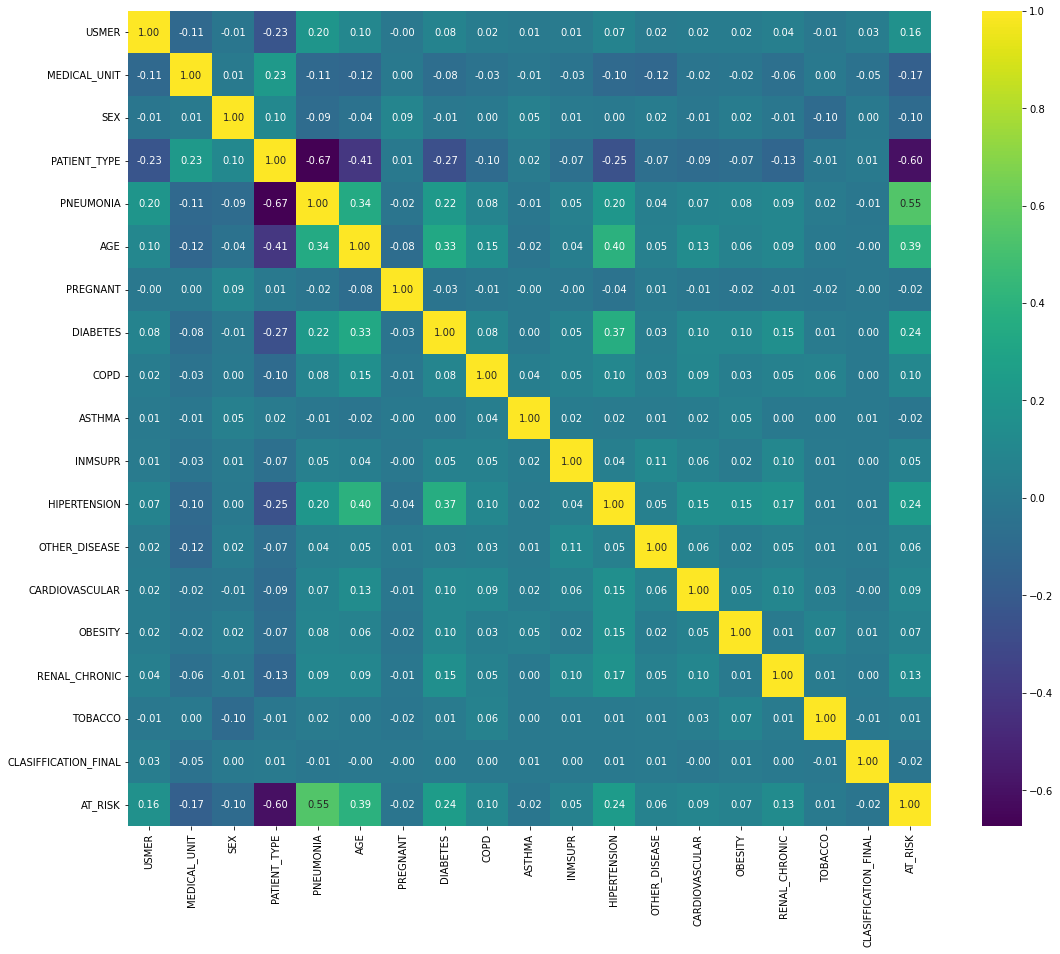

In [ ]:
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(),annot=True,cmap='viridis',fmt=".2f")

In [ ]:
unrelevant_columns = ['PREGNANT','ASTHMA','INMSUPR','OTHER_DISEASE',
                      'CARDIOVASCULAR','OBESITY','TOBACCO','CLASIFFICATION_FINAL']

In [ ]:
df.drop(columns=unrelevant_columns,inplace=True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


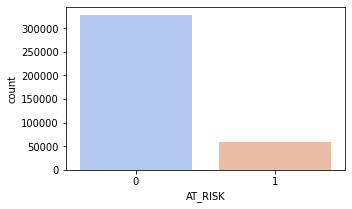

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(df.AT_RISK,palette='coolwarm')

In [ ]:
df = pd.get_dummies(df,columns=['MEDICAL_UNIT'],drop_first=True)

In [ ]:
df.head(3)

,USMER,SEX,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,COPD,HIPERTENSION,RENAL_CHRONIC,AT_RISK,...,MEDICAL_UNIT_4,MEDICAL_UNIT_5,MEDICAL_UNIT_6,MEDICAL_UNIT_7,MEDICAL_UNIT_8,MEDICAL_UNIT_9,MEDICAL_UNIT_10,MEDICAL_UNIT_11,MEDICAL_UNIT_12,MEDICAL_UNIT_13
0,0,1,1,1,65,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,55,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,68,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


Scaling the nummeric feature

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df.AGE = scaler.fit_transform(df.AGE.values.reshape(-1,1))
# df.AGE =  pd.DataFrame(scaler.fit_transform(diabetes_data_copy.drop(["Outcome"],axis = 1),),
#         columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
#        'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [ ]:
df.AGE

0          1.206730
2          0.598917
4          1.389075
5         -0.312803
6          1.145949
             ...   
1047933    1.936107
1047934    0.598917
1047935    1.510637
1047936   -0.799054
1047937   -0.920617
Name: AGE, Length: 388878, dtype: float64

In [ ]:
# from sklearn.preprocessing import RobustScaler
# scaler = RobustScaler()
# df.AGE = scaler.fit_transform(df.AGE.values.reshape(-1,1))

In [ ]:
# df.AGE

Split Test Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('AT_RISK',axis=1)
y  = df['AT_RISK']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
random_state=101)

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
predictions = dtree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

Calculate precision, recall, f1-score

In [ ]:
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     65810
           1       0.62      0.59      0.60     11966

    accuracy                           0.88     77776
   macro avg       0.77      0.76      0.77     77776
weighted avg       0.88      0.88      0.88     77776



[[61409  4401]
 [ 4891  7075]]


Membenari distribusi nilai yang tidak seimbang

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
X_resampled,y_resampled = rus.fit_resample(X,y)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


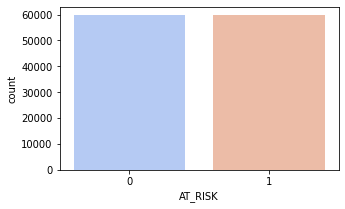

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(y_resampled,palette='coolwarm')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.20, random_state=101)

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87     12021
           1       0.86      0.90      0.88     11971

    accuracy                           0.87     23992
   macro avg       0.87      0.87      0.87     23992
weighted avg       0.87      0.87      0.87     23992



[[10242  1779]
 [ 1245 10726]]


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predictions = logreg.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88     12021
           1       0.87      0.91      0.89     11971

    accuracy                           0.89     23992
   macro avg       0.89      0.89      0.89     23992
weighted avg       0.89      0.89      0.89     23992



[[10378  1643]
 [ 1067 10904]]


F1-SCORE memiliki hasil yang lebih baik yaitu 89%

In [ ]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB(priors=[0.8,0.2],var_smoothing=0.0002848035868435802)

# fit the model
gnb.fit(X_train, y_train)

gnb.class_prior_

array([0.8, 0.2])

In [ ]:
y_pred = gnb.predict(X_test)

y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8381


In [ ]:
y_pred_train = gnb.predict(X_train)

y_pred_train

array([1, 1, 0, ..., 0, 1, 0])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8349


In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.8349
Test set score: 0.8381
